In [2]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob

data = pd.read_csv('ChatGPT.csv', low_memory=False)


In [3]:
# Checking for null values in the Tweet column
print("Number of null values in Tweet column before filling: ", data['Tweet'].isnull().sum())

# Filling null values with empty strings
data['Tweet'] = data['Tweet'].fillna('')

# Checking again for null values in the Tweet column after filling
print("Number of null values in Tweet column after filling: ", data['Tweet'].isnull().sum())



Number of null values in Tweet column before filling:  6
Number of null values in Tweet column after filling:  0


In [4]:
# Custom function to preprocess
def dataPrep(text):
    if not isinstance(text, str):  # checking text is a string
        return "" 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # to remove URLs
    text = re.sub(r'\@\w+|\#', '', text) # to remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # to remove special characters
    text = text.lower() # converting text to lowercase
    return text

# Applying the dataPrep function to clean the text
data['CleanedTweet'] = data['Tweet'].apply(dataPrep)


In [5]:
# Function to apply Sentiment Analysis
def sentimentAnalysis(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

data['Sentiment'] = data['CleanedTweet'].apply(sentimentAnalysis)


count    305432.000000
mean          0.123198
std           0.261039
min          -1.000000
25%           0.000000
50%           0.033333
75%           0.263941
max           1.000000
Name: Sentiment, dtype: float64


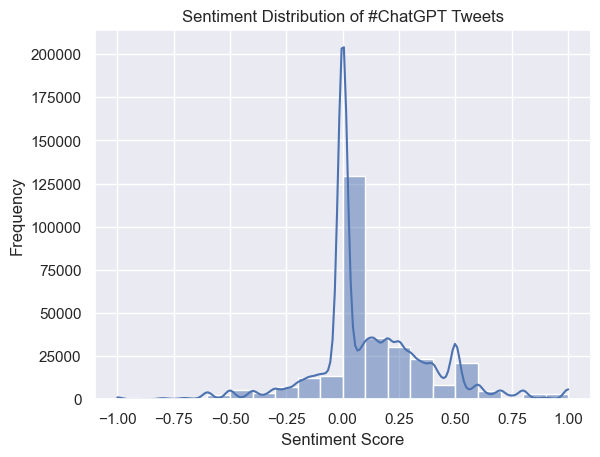

In [6]:
# Summary statistics
print(data['Sentiment'].describe())

# Visualisation of the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
sns.histplot(data=data, x='Sentiment', bins=20, kde=True)
plt.title('Sentiment Distribution of #ChatGPT Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Topic Analysis

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Tokenization of the cleaned tweets
data['TokenizedTweet'] = data['CleanedTweet'].apply(lambda x: word_tokenize(x))

# Removing stopwords and short tokens 
stop_words = set(stopwords.words('english'))
data['TokenizedTweet'] = data['TokenizedTweet'].apply(lambda x: [token for token in x if token not in stop_words and len(token) > 1])


In [10]:
# Dictionary from the tokenized tweets
dictionary = corpora.Dictionary(data['TokenizedTweet'])

# Corpus from the tokenized tweets
corpus = [dictionary.doc2bow(tweet) for tweet in data['TokenizedTweet']]


In [11]:
# LDA model training with 5 topics and displaying of topics
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=2, random_state=42, eval_every=1)


topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.035*"chatgpt" + 0.021*"art" + 0.021*"ai" + 0.016*"bitcoin" + 0.015*"crypto"')
(1, '0.107*"chatgpt" + 0.068*"openai" + 0.047*"ai" + 0.029*"google" + 0.015*"search"')
(2, '0.086*"chatgpt" + 0.023*"ai" + 0.010*"use" + 0.009*"like" + 0.008*"using"')
(3, '0.074*"chatgpt" + 0.043*"ai" + 0.021*"openai" + 0.012*"new" + 0.012*"future"')
(4, '0.115*"chatgpt" + 0.016*"asked" + 0.014*"write" + 0.008*"like" + 0.007*"good"')


In [12]:
ethics_keywords = ["bias", "transparency", "accountability", "privacy", "discrimination", "responsibility", "job"]

def contains_ethics_keywords(tweet):
    return any(keyword in tweet for keyword in ethics_keywords)

data["EthicsRelated"] = data["CleanedTweet"].apply(contains_ethics_keywords)
ethics_data = data[data["EthicsRelated"]].copy()

In [13]:
# Summary statistics
print(data["EthicsRelated"].describe())

count     305432
unique         2
top        False
freq      294979
Name: EthicsRelated, dtype: object


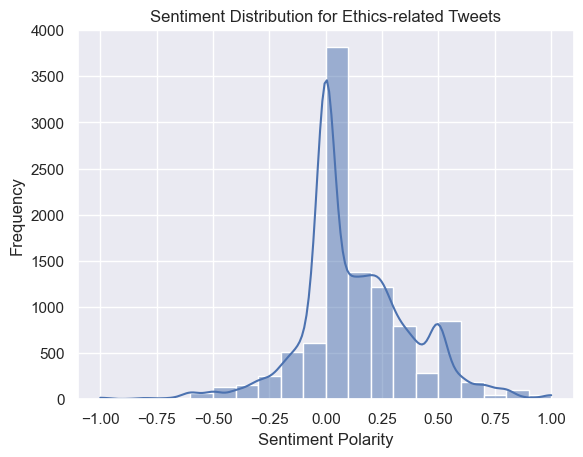

In [12]:
# Perform sentiment analysis on ethics_data
ethics_data['Sentiment'] = ethics_data['CleanedTweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualise the sentiment distribution
sns.histplot(data=ethics_data, x='Sentiment', bins=20, kde=True)
plt.title("Sentiment Distribution for Ethics-related Tweets")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


In [14]:
# Summary statistics
print(ethics_data['Sentiment'].describe())

count    10453.000000
mean         0.131244
std          0.251641
min         -1.000000
25%          0.000000
50%          0.080952
75%          0.275000
max          1.000000
Name: Sentiment, dtype: float64


In [15]:
ethics_keywords = ["ethics", "bias", "fairness", "privacy", "transparency", "accountability", "safety", "security", "trust", "responsibility", "regulation"]

ethics_data = data[data['CleanedTweet'].str.contains('|'.join(ethics_keywords), case=False)]



In [16]:
ethics_data = ethics_data.copy()

ethics_data['TokenizedTweet'] = ethics_data['CleanedTweet'].apply(lambda x: word_tokenize(x))

stop_words = set(stopwords.words('english'))
ethics_data['TokenizedTweet'] = ethics_data['TokenizedTweet'].apply(lambda x: [word for word in x if word not in stop_words and len(word) > 2])


In [17]:
from nltk.stem import WordNetLemmatizer


In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
lemmatizer = WordNetLemmatizer()

ethics_data['TokenizedTweet'] = ethics_data['TokenizedTweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [21]:
dictionary = corpora.Dictionary(ethics_data['TokenizedTweet'])
corpus = [dictionary.doc2bow(text) for text in ethics_data['TokenizedTweet']]


In [22]:
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=3, random_state=42)


In [23]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.059*"chatgpt" + 0.029*"machinelearning" + 0.027*"cybersecurity" + 0.026*"python" + 0.026*"100daysofcode"')
(1, '0.063*"chatgpt" + 0.034*"cybersecurity" + 0.017*"security" + 0.014*"malware" + 0.011*"new"')
(2, '0.065*"chatgpt" + 0.023*"security" + 0.017*"cybersecurity" + 0.010*"openai" + 0.007*"infosec"')
(3, '0.075*"chatgpt" + 0.020*"ethic" + 0.011*"openai" + 0.011*"cybersecurity" + 0.010*"artificialintelligence"')
(4, '0.068*"chatgpt" + 0.027*"bias" + 0.016*"trust" + 0.011*"biased" + 0.010*"data"')


In [24]:
lda_model2 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)


In [25]:
topics = lda_model2.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.055*"chatgpt" + 0.036*"machinelearning" + 0.031*"python" + 0.031*"cybersecurity" + 0.030*"100daysofcode"')
(1, '0.066*"chatgpt" + 0.044*"cybersecurity" + 0.019*"security" + 0.017*"malware" + 0.010*"new"')
(2, '0.062*"chatgpt" + 0.023*"security" + 0.015*"cybersecurity" + 0.010*"openai" + 0.007*"google"')
(3, '0.076*"chatgpt" + 0.020*"ethic" + 0.011*"technology" + 0.011*"artificialintelligence" + 0.010*"openai"')
(4, '0.070*"chatgpt" + 0.028*"bias" + 0.016*"trust" + 0.011*"biased" + 0.010*"data"')


In [26]:
ethics_data['lda_doc_topics'] = [lda_model2[doc] for doc in corpus]

In [27]:
# Assign topic labels to each tweet
def get_topic_label(topic_dist):
    return max(topic_dist, key=lambda x: x[1])[0]

ethics_data['TopicLabel'] = ethics_data['lda_doc_topics'].apply(get_topic_label)

# Filter the dataset to only include tweets with the topic labels corresponding to topics 3 and 4
focused_topics_data = ethics_data[(ethics_data['TopicLabel'] == 3) | (ethics_data['TopicLabel'] == 4)]

In [28]:
# Word count from focused topics
from collections import Counter

word_count = Counter()
for tweet in focused_topics_data['TokenizedTweet']:
    word_count.update(tweet)

print(word_count.most_common(10))

[('chatgpt', 8509), ('bias', 1611), ('ethic', 888), ('cybersecurity', 878), ('trust', 859), ('data', 789), ('openai', 768), ('biased', 720), ('amp', 715), ('security', 605)]


In [29]:
focused_topics_data = ethics_data[(ethics_data['TopicLabel'] == 3) | (ethics_data['TopicLabel'] == 4)].copy()


In [30]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
# Sentiment from focused topics
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def sentiment_score(tweet):
    text = ' '.join(tweet)
    return sia.polarity_scores(text)['compound']

focused_topics_data['SentimentScore'] = focused_topics_data['TokenizedTweet'].apply(sentiment_score)


In [32]:
print(focused_topics_data['SentimentScore'])


107       0.7650
129       0.3612
198       0.9735
206      -0.1779
222       0.4404
           ...  
305071    0.7650
305154   -0.1027
305278    0.0000
305300    0.8316
305406    0.8957
Name: SentimentScore, Length: 6917, dtype: float64


In [33]:
# Summary statistics
print(focused_topics_data['SentimentScore'].describe())

count    6917.000000
mean        0.213744
std         0.489834
min        -0.963800
25%        -0.102700
50%         0.296000
75%         0.648600
max         0.978600
Name: SentimentScore, dtype: float64


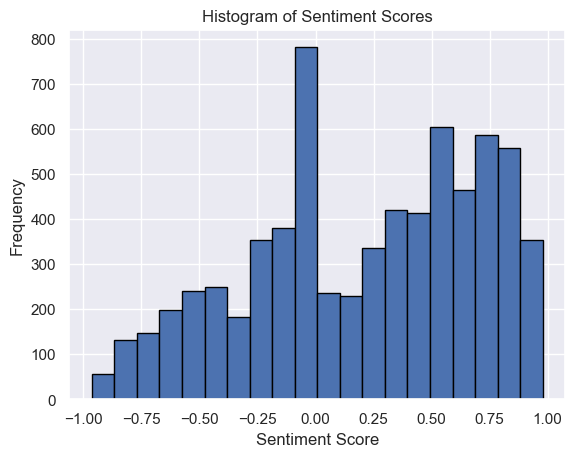

In [34]:
plt.hist(focused_topics_data['SentimentScore'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.show()

In [35]:
# Relationship between sentiment and the identified ethical topics.
grouped_by_topic = focused_topics_data.groupby('TopicLabel')


In [39]:
average_sentiment_by_topic = grouped_by_topic['SentimentScore'].mean()


In [37]:
# Summary statistics
print(grouped_by_topic['SentimentScore'].describe())

             count      mean       std     min     25%     50%     75%     max
TopicLabel                                                                    
3           3175.0  0.227727  0.467754 -0.9403  0.0000  0.2960  0.6249  0.9735
4           3742.0  0.201880  0.507577 -0.9638 -0.2023  0.2732  0.6597  0.9786


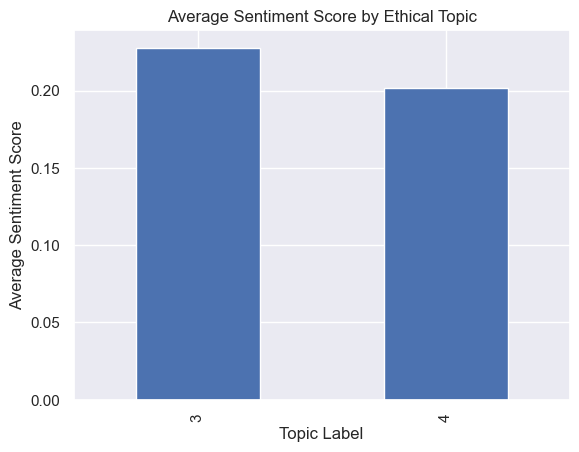

In [34]:

average_sentiment_by_topic.plot(kind='bar')
plt.xlabel('Topic Label')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Ethical Topic')
plt.show()


In [44]:
correlation_matrix = focused_topics_data[['TopicLabel', 'SentimentScore']].corr()


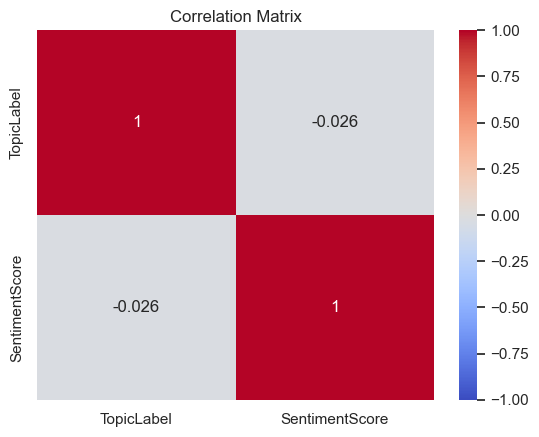

In [45]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [46]:
# Demographic and geographic distribution of opinions regarding AI ethics.
!pip install geopy
!pip install geotext


In [47]:
import re
import pandas as pd
from geopy.geocoders import Nominatim
from geotext import GeoText




In [48]:
# Clean location data using geopy
def clean_location(location):
    geolocator = Nominatim(user_agent="ai_ethics_analysis")
    try:
        loc = geolocator.geocode(location, timeout=10)
        if loc:
            return loc.address
    except:
        return None
    return None



In [49]:
# Extractng countries from cleaned locations using geotext
def extract_country(location):
    if location:
        country = GeoText(location).country_mentions
        if country:
            return list(country.keys())[0]
    return None



In [50]:
# Cleaning and preprocessing of location data
focused_topics_data['CleanedLocation'] = focused_topics_data['Location'].apply(clean_location)
focused_topics_data['Country'] = focused_topics_data['CleanedLocation'].apply(extract_country)



In [51]:
# Extracting gender from user descriptions 
def extract_gender(description):
    male_keywords = ["male", "man", "boy"]
    female_keywords = ["female", "woman", "girl"]

    if not isinstance(description, str):
        return "unknown"

    if any(keyword in description.lower() for keyword in male_keywords):
        return "male"
    elif any(keyword in description.lower() for keyword in female_keywords):
        return "female"
    else:
        return "unknown"





In [52]:
focused_topics_data['Gender'] = focused_topics_data['UserDescription'].apply(extract_gender)

In [53]:
# Grouping the dataset by demographic categories
gender_sentiment = focused_topics_data.groupby('Gender')['SentimentScore'].mean()


In [54]:
# Grouping the dataset by geographic location
country_sentiment = focused_topics_data.groupby('Country')['SentimentScore'].mean()


In [55]:
# Summary statistics
print(gender_sentiment)

# Summary statistics
print(country_sentiment)

Gender
female     0.449661
male       0.190439
unknown    0.215606
Name: SentimentScore, dtype: float64
Country
AR    0.657450
AU    0.340388
BE    0.644500
BR    0.059300
CA    0.318084
CO    0.175060
DE    0.169500
EC    0.731500
EE   -0.812600
ES    0.016725
FI   -0.624900
FR    0.126857
GB    0.253168
GE   -0.778300
HK   -0.156133
ID    0.000000
IN    0.098664
IT    0.593633
KY   -0.077200
LT   -0.784500
NL   -0.088050
NO    0.204650
NZ    0.722550
PA    0.128000
PG   -0.784500
PH    0.085700
PK    0.275700
PT   -0.242300
RO    0.510600
SE    0.097633
SG    0.155550
UG   -0.021550
US    0.253230
VE    0.179533
ZA    0.366682
Name: SentimentScore, dtype: float64


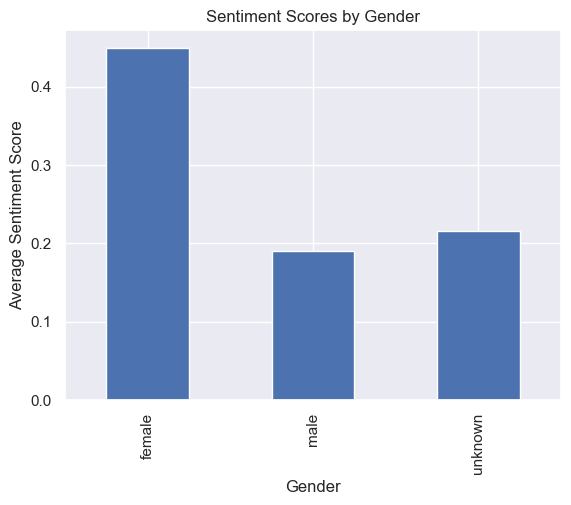

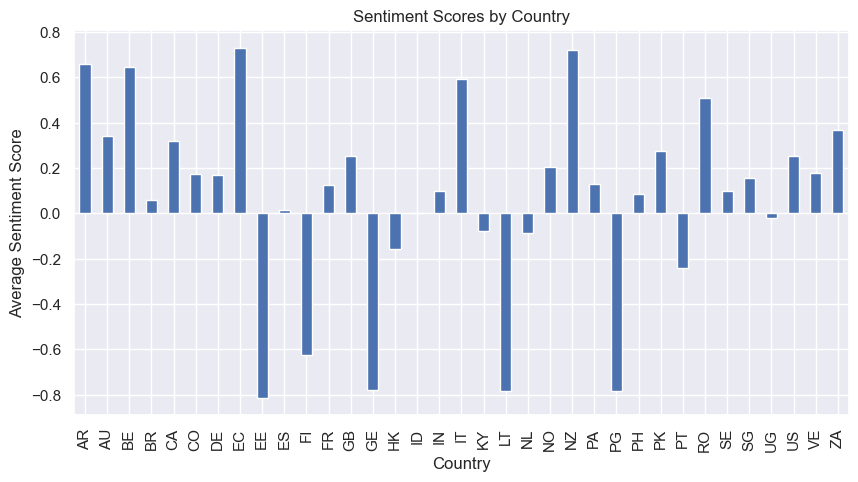

In [56]:

# Visualise sentiment scores across demographic groups
gender_sentiment.plot(kind='bar')
plt.title('Sentiment Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sentiment Score')
plt.show()

# Visualise sentiment scores across countries
country_sentiment.plot(kind='bar', figsize=(10, 5))
plt.title('Sentiment Scores by Country')
plt.xlabel('Country')
plt.ylabel('Average Sentiment Score')
plt.show()


In [57]:
# Descriptive analysis.
topic_counts = focused_topics_data['TopicLabel'].value_counts()


In [58]:
print(topic_counts)

4    3742
3    3175
Name: TopicLabel, dtype: int64


In [59]:
tweets_by_country = focused_topics_data['Country'].value_counts()


In [62]:
print(tweets_by_country)

US    229
GB     56
IN     44
CA     32
FR     14
ZA     11
DE      8
AU      8
HK      6
PH      6
CO      5
NZ      4
ES      4
PK      3
BR      3
VE      3
IT      3
SE      3
SG      2
NO      2
PT      2
NL      2
UG      2
AR      2
BE      2
EC      2
LT      1
RO      1
GE      1
PA      1
EE      1
PG      1
KY      1
ID      1
FI      1
Name: Country, dtype: int64


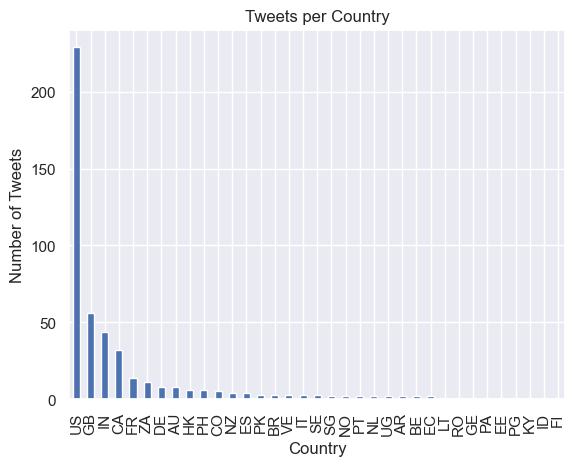

In [63]:
# Visualise 
tweets_by_country.plot(kind='bar')
plt.title('Tweets per Country')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.show()

In [64]:
correlation_influence_sentiment = focused_topics_data[['UserFollowers', 'SentimentScore']].corr()


In [65]:
print(correlation_influence_sentiment)

                UserFollowers  SentimentScore
UserFollowers        1.000000       -0.003187
SentimentScore      -0.003187        1.000000


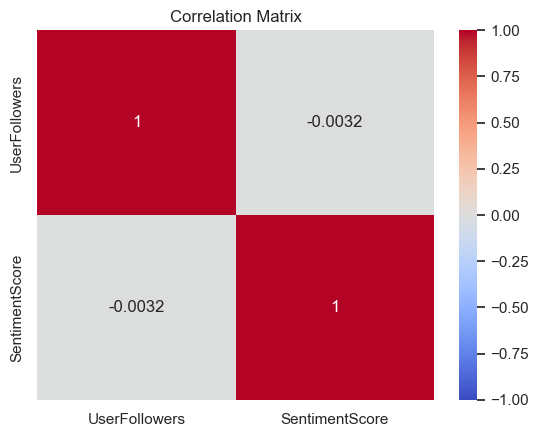

In [66]:
# Heatmap
sns.heatmap(correlation_influence_sentiment, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [55]:
average_sentiment_by_gender = focused_topics_data.groupby('Gender')['SentimentScore'].mean()
topic_counts_by_gender = focused_topics_data.groupby('Gender')['TopicLabel'].value_counts()


In [56]:
print(average_sentiment_by_gender)

Gender
female     0.449661
male       0.190439
unknown    0.215606
Name: SentimentScore, dtype: float64


In [57]:
print(topic_counts_by_gender)

Gender   TopicLabel
female   4               11
         3                7
male     4              346
         3              333
unknown  4             3385
         3             2835
Name: TopicLabel, dtype: int64
